# U.S. Medical Insurance Costs





### SCOPE OF THIS PROJECT:
- I would like to check which categories/columns are present in the dataset.
- I would like to check for any missing data. Later, I will decide whether to extrapolate the missing data, delete incomplete rows, or take another approach.
- I would like to play with data visualization
- I would like to analyze which parameters influence the cost of insurance.
- I would like to create a linear regression model and annalize coefficients.
- I would like to build a class as a practice goal.

#### **1. Import and loading of data**

In [15]:
# importing necessary libraries
import csv
import pandas as pd
from pathlib import Path

import os 
print(os.getcwd()) #prints the location of the current folder, I use it to ensure how to write the path to dataset:

# path to dataset
#data_path = Path("data\\insurance.csv") 
data_path = Path("../data/insurance.csv") # jestem teraz w folderze src, muszę przejść o jeden poziom wyżej (do folderu głównego projektu), a następnie do folderu data.

import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for data visualization


C:\Users\Kali Wilk\Desktop\CodeCademy---Medical-Insurance-Cost---Python\python-portfolio-project\src


In [2]:
##IMPORT FUNCTIONS FROM LOCAL FILES:
import data_utils as du
#from data_utils import read_header, print_X_rows, all_unique_categorical_values

In [3]:
import class_person as cp

In [4]:
# reading in the dataset insurance.csv with the import csv library
with open(data_path, 'r') as insurance_csv:
    #insurance_data_list = insurance_csv.read()
    insurance_data = csv.reader(insurance_csv)
    du.read_header(insurance_data)     #what columns are in the dataset? ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
    
    

Headers:  ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [ ]:
# reading in the dataset insurance.csv with the import pandas as pd
df = pd.read_csv(data_path)

#### **2. Basic exploration**

In [ ]:
# Print the first 2 rows
du.print_X_rows(3, df)

# Print basic statistics:
print("\n",df.describe())

First 3 rows: 
   age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523
2   28    male  33.00         3     no  southeast   4449.4620

                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [34]:
#print unique arguments from the columns with non-numerical values
du.all_unique_categorical_values(df)

Unique calues in 'sex':
['female' 'male'] 

Unique calues in 'smoker':
['yes' 'no'] 

Unique calues in 'region':
['southwest' 'southeast' 'northwest' 'northeast'] 



#### **3.Identifying missing values**

In [7]:
# Checking if there are missing values in the dataset:
du.if_missing_data(df)


Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
# In which row are the missing values?
du.where_the_missing_data(df)

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Good News! There is no missing data!


#### **4.Visual analysis of the impact of variables on** *charges*

#### Visualizing categorical variables (smoker, region, sex)

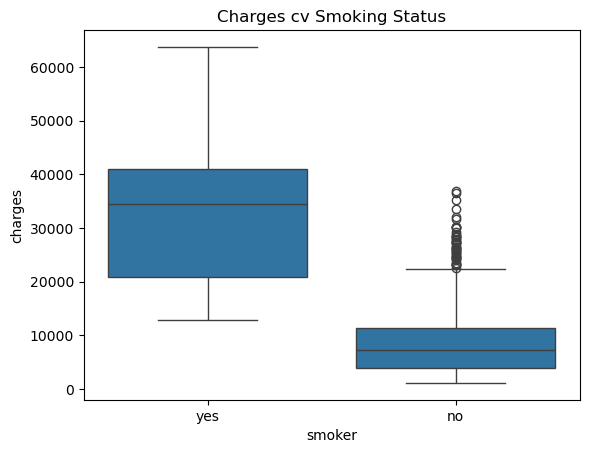

In [21]:
#smoker
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges cv Smoking Status')
plt.show()

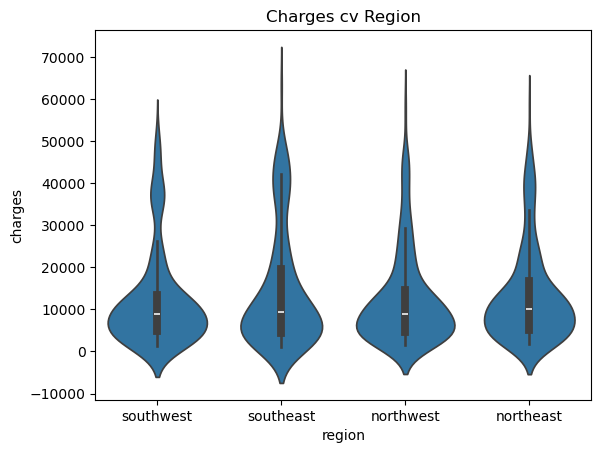

In [26]:
#region
sns.violinplot(x='region', y='charges', data=df)
#sns.boxplot(x='region', y='charges', data=df)

plt.title('Charges cv Region')
plt.show()

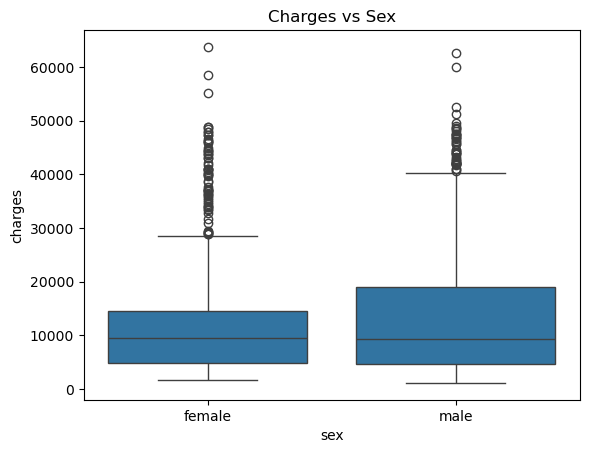

In [31]:
#sex
sns.boxplot(x='sex', y='charges', data=df)
#sns.violinplot(x='sex', y='charges', data=df)
plt.title('Charges vs Sex')
plt.show()

#### Visualizing numerical variables (age, bmi, children)

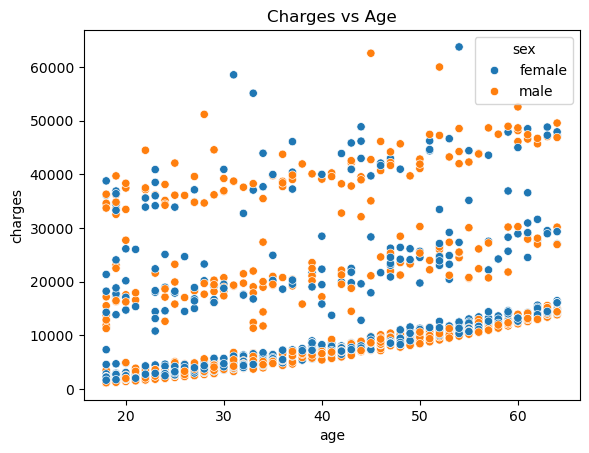

In [39]:
sns.scatterplot(x='age', y='charges', hue='sex', data=df)
plt.title('Charges vs Age')
plt.show()

<Axes: xlabel='bmi', ylabel='charges'>

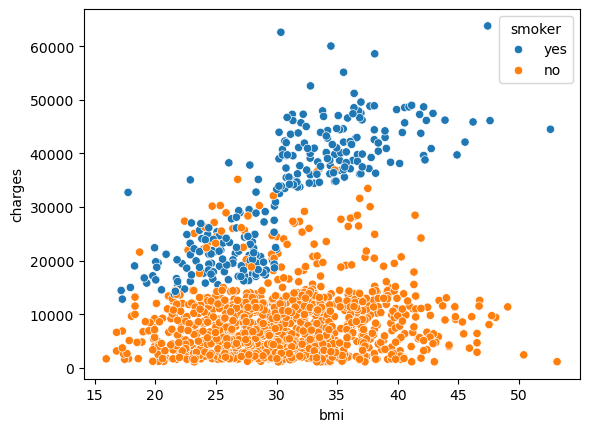

In [38]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)

#### **5. Checking Correlation** 

In [41]:
#Considering the numeric parameters only
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

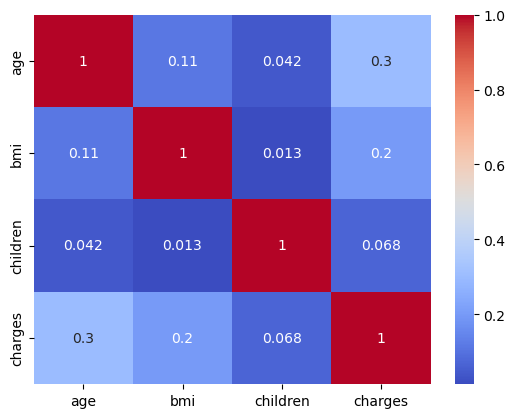

In [42]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

#### **6. Preparing data for the predictive model** 

In [48]:
# Converting the categorical variables into numerical:
df_encoded = pd.get_dummies(df, drop_first = True)
# Separately X (characteristics) and y (target)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

#### **7. Dividing into training and testing groups** 

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### **8. Linear Regression Model** 

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### **9. Model Evaluation** 

In [55]:
#R², MAE, RMSE

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Model Prediction
y_pred = model.predict(X_test)

# Calculating MAE i RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Printing values of R², MAE, RMSE
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse)
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 4181.19447375365
RMSE: 5796.2846592762735
R2 Score: 0.7835929767120723


#### **10. Interpretation**

In [56]:
coeffs = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coeffs.sort_values(by="Coefficient", ascending=False))

                   Coefficient
smoker_yes        23651.128856
children            425.278784
bmi                 337.092552
age                 256.975706
sex_male            -18.591692
region_northwest   -370.677326
region_southeast   -657.864297
region_southwest   -809.799354


**smoker_yes:** The coefficient is 23,651.13, which means that people who smoke have insurance costs approximately 23,651 units higher compared to non-smokers (assuming other variables are held constant).

Other variables also have an impact, but their influence is much smaller:

- **children:** For each additional person dependent on the individual, the insurance cost increases by 425.28 units.
- **bmi:** A one-unit increase in BMI leads to an increase in insurance cost by 337.09 units.
- **age:** Each additional year of age increases the insurance cost by 256.98 units.
- **sex_male:** Men have insurance costs 18.59 units lower than women, but this impact is minimal.
- **region:** The coefficients for regions show that people from the northwest, southeast, and southwest regions pay less than those from the southwest region, but these differences are smaller than those related to smoking.

### TESTING CLASS PERSON - just a fun excercise :)

In [9]:
# Creating first object of Class Person:
i=1

pierwsza_osoba = cp.Person(df.iloc[i]['age'], df.iloc[i]['sex'], df.iloc[i]['bmi'], df.iloc[i]['children'],
                        df.iloc[i]['smoker'], df.iloc[i]['region'], df.iloc[i]['charges'])
print(pierwsza_osoba.who_are_you())

Age: 18, Sex: male, BMI: 33.77, Children: 1, Smoker: no, Region: southeast, Insurance Cost: 1725.5523.


In [10]:
print(pierwsza_osoba)
print(pierwsza_osoba.who_are_you())
print(pierwsza_osoba.region)

Age: 18 Sex: male, BMI: 33.77, Children: 1, Smoker: no, Region: southeast, Insurance Cost: 1725.5523.
Age: 18, Sex: male, BMI: 33.77, Children: 1, Smoker: no, Region: southeast, Insurance Cost: 1725.5523.
southeast


In [11]:
print(type(pierwsza_osoba.region))  # Sprawdzenie typu
print(repr(pierwsza_osoba.region))  # Wyświetlenie surowej wartości

<class 'str'>
'southeast'


In [12]:
print(pierwsza_osoba.region)
print()

southeast

